In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/mnt/storage/home/qc19291/anaconda3/envs/BlindCamera/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('runs/EPIC_baselines/run_18/preds_labels.csv')

In [3]:
df = df[['labels', 'predictions']]

In [4]:
verb_classes = pd.read_csv('/mnt/storage/home/qc19291/scratch/EPIC/epic-kitchens-100-annotations/EPIC_100_verb_classes.csv')
noun_classes = pd.read_csv('/mnt/storage/home/qc19291/scratch/EPIC/epic-kitchens-100-annotations/EPIC_100_noun_classes.csv')
verb_classes = verb_classes.drop('instances', 1)
verb_classes = verb_classes.drop('category', 1)
noun_classes = noun_classes.drop('instances', 1)
noun_classes = noun_classes.drop('category', 1)

verb_dict = verb_classes.set_index('id').to_dict()
noun_dict = noun_classes.set_index('id').to_dict()


In [5]:
cf_matrix = confusion_matrix(df['labels'], df['predictions'])
cf_matrix = pd.DataFrame(cf_matrix)
cf_matrix.index = cf_matrix.index.to_series().map(verb_dict['key'])
cf_matrix.columns = cf_matrix.columns.to_series().map(verb_dict['key'])

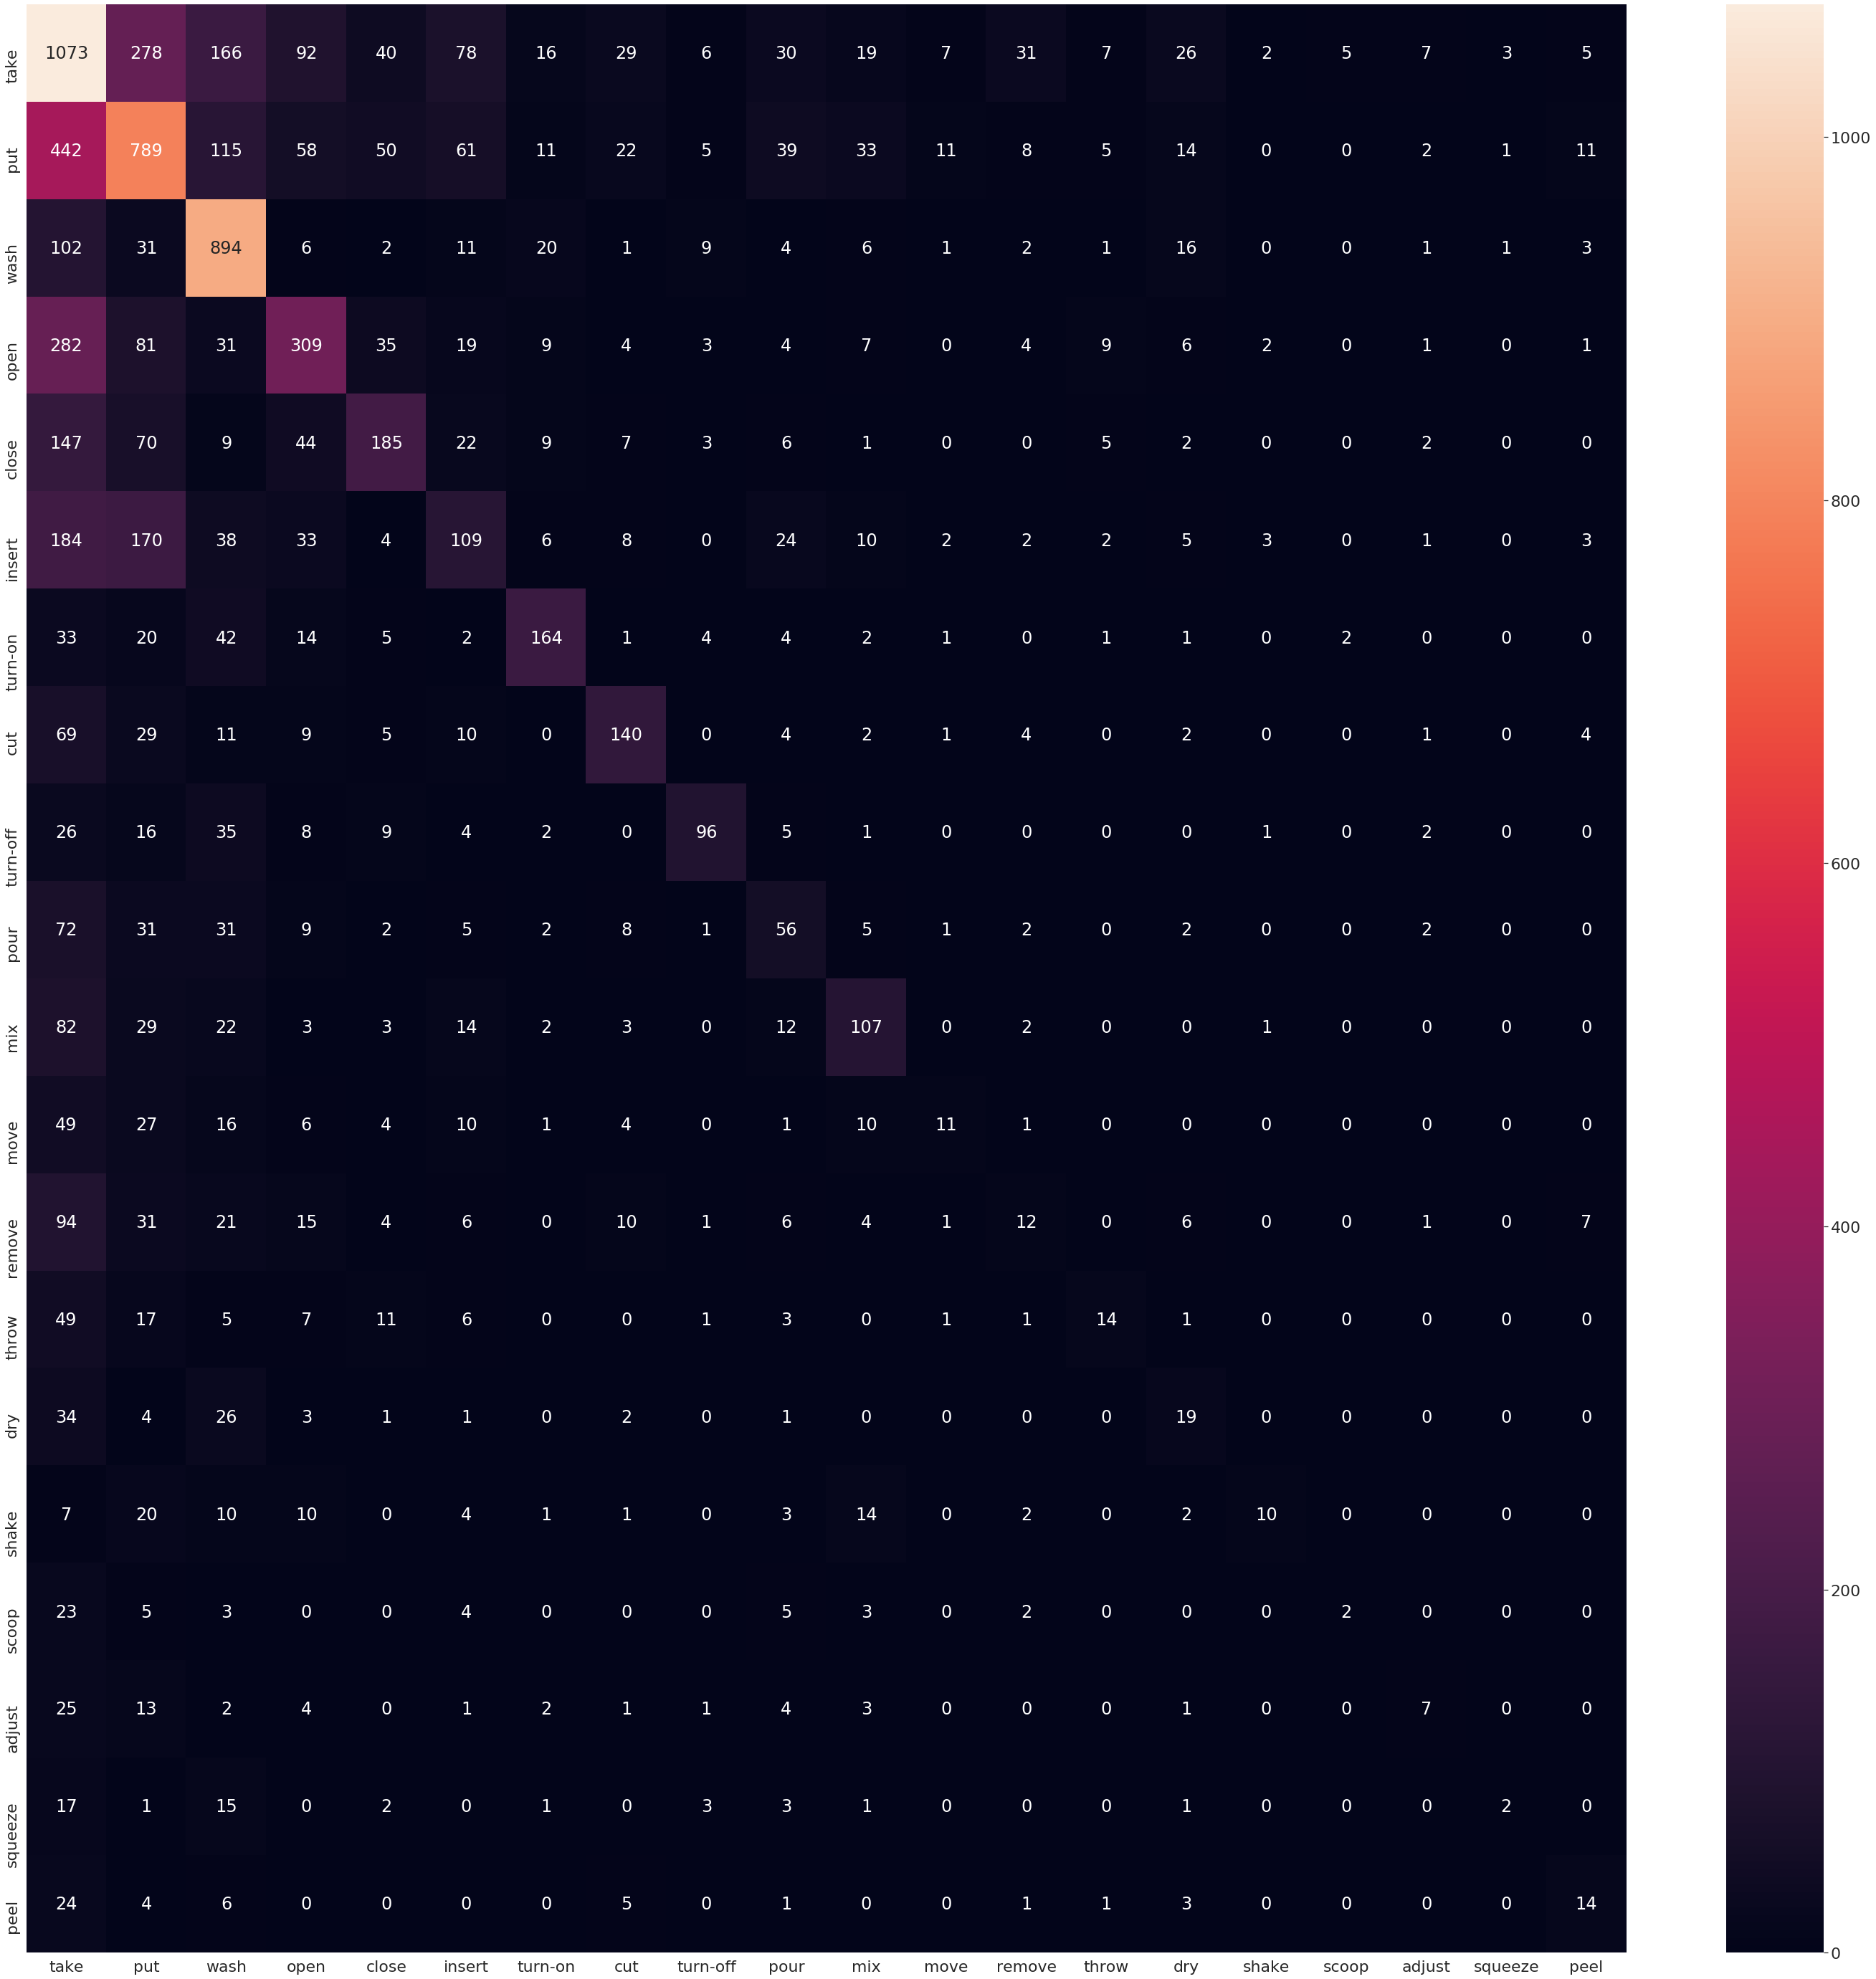

In [6]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(cf_matrix, annot=True, ax=ax, fmt='g')